<center>Заметка 1. 	Повторение. Основные распределения и статистики.</center>
<center>курс <q>Прикладной статистический анализ данных</q>.</center>
<center>Версия 1. 12 февраля 2021 г.</center>

# Основные понятия

![Случайность](https://user-images.githubusercontent.com/60938140/74263436-d9ac0900-4d0f-11ea-8929-bfeecf44fabc.png)

<b>Дискретная</b> случайная величина $X$ принимает счётное множество значений $A = \{a_1, a_2,...\}$ с вероятностями $p_1,p_2, ..., \sum_i p_i = 1$. 

$f_X(a_i) = P(X=a_i)=p_i$ - <b>функция вероятности</b>.

<b>Непрерывная</b> случайная величина задается с помощью функции <b>распределения</b>:
    $$F_X(x)=P(X\le x)$$
или <b>плотности распределения</b>:  
    $$f_X(x): \int\limits_a^{b} f_x(x)dx = P(a \le X \le b)$$

## Характеристики распределений

- <b>Мат.ожидание</b> - среднее значение $X$:  
$$\mathbb{E}X = \int xdF(x)$$

- <b>Дисперсия</b> - мера разброса $X$:  
$$\mathbb{D}X = \mathbb{E}((X-\mathbb{E}X)^2)$$

- <b>Квантиль</b> порядка $\alpha \in (0,1)$:
$$X_\alpha: P(X \le X_\alpha) \ge \alpha, \quad P(X \ge X_\alpha) \ge 1-\alpha$$
- <b>Медиана</b> - квантиль порядка 0.5, центральное значение   
распределения:  
$$\operatorname{med} X: P(X \le \operatorname{med} X) \ge 0.5, \quad P(X \ge \operatorname{med} X) \ge 0.5$$
- <b>Интерквартильный размах</b>:
$$IQR . = X_{0.75} - X_{0.25}$$
- <b>Мода</b> - точка максимума функции вероятности или плотности:
$$\operatorname{mode} X = \operatorname{argmax}_x f(x)$$
- <b>Коэффициент ассиметрии</b> (skewness)
$$\gamma_1 = \mathbb{E}\bigg(\frac{X- \mathbb{E}X}{\sqrt{\mathbb{D}X}}\bigg)^3$$

In [2]:
from scipy.stats import skewnorm, skew
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

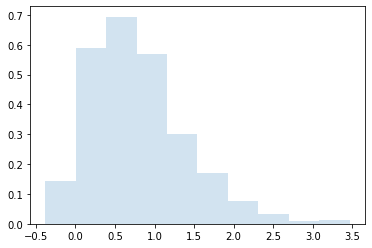

In [4]:
array_skew = skewnorm.rvs(5, size = 1000)

plt.hist(array_skew, density = True, alpha = 0.2)
plt.show()

In [5]:
skew(array_skew)

0.9041384518494295

- <b>Коэффициент эксцесса</b> (excess, без вычитания тройки - kurtosis) 
$$\gamma_2 = \frac {\mathbb{E}(X-\mathbb{E}X)^4}{(\mathbb{D}X)^2}-3$$

In [7]:
from scipy.stats import kurtosis 
from scipy.stats import logistic, laplace, norm
x = np.linspace(-5,5,1000)

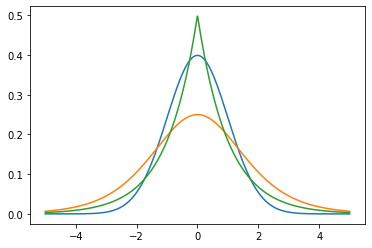

In [10]:
plt.plot(x, norm.pdf(x))
plt.plot(x, logistic.pdf(x))
plt.plot(x, laplace.pdf(x))

## Статистики

### Нормальное распределение

$X \in \mathbb{R} \sim N(\mu,\sigma^2),\quad \sigma^2 > 0$

- Предельное распределение суммы слабо взаимозависимых сл. в.   

- $\mathbb{E}X=\operatorname{med}X=\operatorname{mode}X=\mu, \mathbb{D}X=\sigma^2$, все моменты более высокого порядка нулевые  

- Пусть $X_1,\ldots,X_n$ независимы, $X_i \sim N(\mu_i,\sigma_{i}^2)$, тогда $\forall a_i, \ldots, a_n$  
$$\sum\limits_{i=1}^{n} \alpha_i X_i \sim  N\bigg(\sum\limits_{i=1}^n a_i \mu_i, \sum\limits_{i=1}^n a_{i}^2 \sigma^{2}_i\bigg)$$  

- Центральная предельная теорема: пусть $X_1,\ldots, X_n$ i.i.d. с $\mathbb{E}X$ и
    $\mathbb{D}X < \infty$, тогда  
    $$\frac{1}{n}\sum\limits_{i=1}^{n} X_i\sim\approx N \bigg(\mathbb{E}X, \frac{\mathbb{D}X}{n}\bigg)$$  
    
- Пример: погрешность измерения

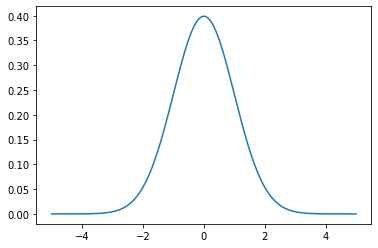

In [16]:
plt.plot(x, norm.pdf(x, 0,1))

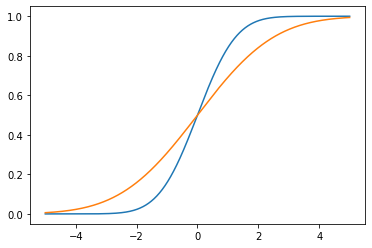

In [18]:
plt.plot(x, norm.cdf(x, 0,1))
plt.plot(x, norm.cdf(x, 0,2))

In [12]:
?norm.pdf

### Распределение хи-квадрат

$X \in \mathbb{R}_+ \sim \chi^{2}_{k}, k \in \mathbb{N}$

- Пусть $X_1,\ldots,X_k$ - i.i.d., $\quad X_i \sim N(0,1)$, тогда
$$\sum\limits_{i=1}^{n} X^{2}_i \sim \chi^{2}_k$$  
- Пример: нормированная выборочная дисперсия $$(n-1)\frac{S^{2}_n}{\sigma^2} \sim \chi^2_{n-1}$$

In [3]:
from scipy.stats import chi2

### Распределение Стьюдента

$X \in \mathbb{R} \sim St(v), v >0$

- $\mathbb{E}X=0$ при $v>1$, $\operatorname{med}X=\operatorname{mode}X=0$
- Пусть $Z \sim N(0,1)$ и $V \sim \chi^{2}_{v}$, тогда
$$T = \frac{Z}{\sqrt{V/v}} \sim St(v)$$
- Если $X \sim St(v)$, то 
$$Y = \lim\limits_{v \to \infty }X \sim N(0,1)$$
- Возникает при оценке среднего значения сл. в. с неизвестной дисперсией

In [20]:
from scipy.stats import t

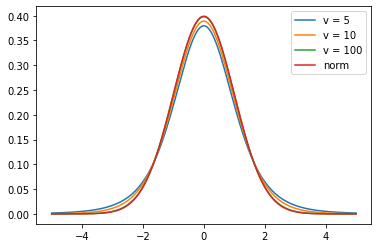

In [28]:
plt.plot(x, t.pdf(x, 5), label = 'v = 5')
plt.plot(x, t.pdf(x, 10), label = 'v = 10')
plt.plot(x, t.pdf(x, 100), label = 'v = 100')
plt.plot(x, norm.pdf(x, 0,1), label = 'norm')
plt.legend(loc = 'best')

### Распределение Фишера

$X \in \mathbb{R}_+ F(d_1, d_2), d_1,d_2 > 0$

- пусть $X_1 \sim \chi^2_{d_1}, X_2 \sim \chi^2_{d_2}, X_1$ и $X_2$ независимы, тогда
$\frac{X_1/d_1}{X_2/d2} \sim F(d_1, d_2)$
- если $X \sim F(d_1, d_2)$, то $Y = \lim_{d_2 \to \infty} d_1 X \sim \chi^2_{d_1} $
- $F(x, d_1, d_2) = F(1/x, d_2, d_1)$
- возникает в дисперсионном и регрессионном анализе

In [30]:
from scipy.stats import f

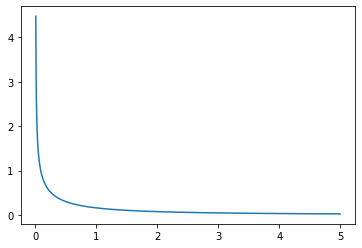

In [33]:


x1 = np.linspace(0,5,1000)
plt.plot(x1, f.pdf(x1, 1, 1), label = '1,1')

### Биномиальное распределение

$X \in \{0,..., N\} \sim Bin(N,p), N \in \mathbb{N}, p \in [0,1]$

- пусть $X_1, ..., X_n$ независимы, $X_i \sim Ber(p)$, тогда $\sum_{i=1}^{n}X_i \sim Bin(n,p)$
- $Bin(1,p) = Ber(p)$
- если $N > 20$ и $p$ не слишком близко к нулю или единице, то для $X \sim Bin(N,p)$ справедлива нормальная апроксимация 
$F_X(x) = \Phi \Big(\frac{x - Np}{\sqrt{Np(1-p)}}\Big)$
- пример: число попаданий из N бросков в баскетбольное кольцо

In [6]:
from scipy.stats import binom

### Распределение Бернулли

$X \ in {0,1} \sim Ber(p), p \in (0,1)$

$F(x) = 
 \begin{cases}
    0,& x < 0\\
   1-p, & 0 \le x < 1 \\
   1, & x \ge 1
 \end{cases}$
 
$f(x) = 
 \begin{cases}
    1-p,& x = 0\\
   p, & x = 1
 \end{cases}$

In [7]:
from scipy.stats import bernoulli

### Распределение Пуассона

$X \in \{0,1,2,..\} \sim Pois(\lambda), \lambda > 0$

- распределение числа независимых событий в фиксированном временном или пространственном интервале
- $\mathbb{E} X = \mathbb{D} X = \lambda$
- пусть $X_1, ..., X_n$ независимы, $X_i \sim Pois(\lambda_i)$ , тогда $\sum_{i=1}^{n} X_i \sim Pois \Big(\sum_{i=1}^{n} \lambda_i \Big)$
- если $X \sim Pois(\lambda)$, $Y = \sqrt{X}$, то при больших $\lambda$ $F_Y(x)\approx\Phi \Big(\frac{x - \sqrt{\lambda}}{\sqrt{\lambda}}\Big)$
- пример: количество изюма в булочке с изюмом

In [8]:
from scipy.stats import poisson

## Статистики

$F_n(x) = \frac{1}{n} \sum\limits_{i=1}^{n}[X_i \le x]$ - эмпирическая функция распределения (ECDF). 

# Эксперимент Майкельсона

Данные классического эксперимента Майкельсона по измерению скорости света с помощью вращающегося зеркала, 100 наблюдений:

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.utils import shuffle

In [36]:
speed = np.genfromtxt('speed.txt')
speed

array([299850., 299740., 299900., 300070., 299930., 299850., 299950.,
       299980., 299980., 299880., 300000., 299980., 299930., 299650.,
       299760., 299810., 300000., 300000., 299960., 299960., 299960.,
       299940., 299960., 299940., 299880., 299800., 299850., 299880.,
       299900., 299840., 299830., 299790., 299810., 299880., 299880.,
       299830., 299800., 299790., 299760., 299800., 299880., 299880.,
       299880., 299860., 299720., 299720., 299620., 299860., 299970.,
       299950., 299880., 299910., 299850., 299870., 299840., 299840.,
       299850., 299840., 299840., 299840., 299890., 299810., 299810.,
       299820., 299800., 299770., 299760., 299740., 299750., 299760.,
       299910., 299920., 299890., 299860., 299880., 299720., 299840.,
       299850., 299850., 299780., 299890., 299840., 299780., 299810.,
       299760., 299810., 299790., 299810., 299820., 299850., 299870.,
       299870., 299810., 299740., 299810., 299940., 299950., 299800.,
       299810., 2998

(array([ 2.,  0.,  7., 11., 27., 25., 10., 11.,  6.,  1.]),
 array([299620., 299665., 299710., 299755., 299800., 299845., 299890.,
        299935., 299980., 300025., 300070.]),
 <a list of 10 Patch objects>)

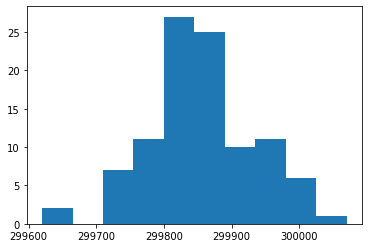

In [37]:
plt.hist(speed)

Можно ли считать наблюдения нормально распределёнными?

## Анализ данных

1. Постройте на одном графике оцененную при помощи ядрового метода сглаженную гистограмму (оценку плотности распределения), а также кривую плотности нормального распределения с параметрами, оцененным по выборке. (Вам помогут функции `gaussian_kde` и `norm.pdf`, из `scipy.stats`)

In [38]:
from scipy.stats import gaussian_kde, norm
import statistics

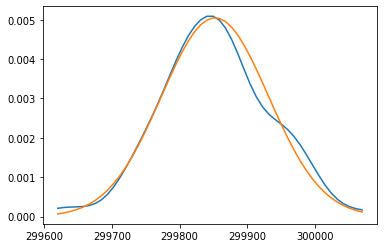

In [41]:
density = gaussian_kde(speed)
x = np.linspace(min(speed), max(speed))
plt.plot(x, density(x))
plt.plot(x, norm.pdf(x, statistics.mean(speed), statistics.stdev(speed)))

2. Постройте на одном графике эмпирическую функцию распределения (emperical CDF), а также кривую функции распределения нормального распределения (CDF) с параметрами, оцененным по выборке.(Используйте `ECDF` из `statsmodels.api`)

In [42]:
import statsmodels.api as sm 

In [43]:
ecdf = sm.distributions.ECDF(speed)
y = ecdf(x)

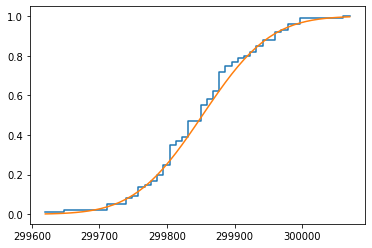

In [46]:
plt.step(x,y)
plt.plot(x, norm.cdf(x, statistics.mean(speed), statistics.stdev(speed)))

Статистика $T(X^n)$ - любая измеримая функция выборки.
- выборочное среднее:
$$\bar{X} = \frac{1}{n}\sum\limits_{i=1}^n X_i$$
- выборочная дисперсия:
$$S^2 = \frac{1}{n-1}\sum\limits_{i=1}^{n}(X_i - \bar{X})^2$$

\
Вариационный ряд:
$$X_{(1)} \le X_{(2)} \le \ldots \le X_{(n)}$$
Ранг элемента выборки X_i:
$$\operatorname{rank}(X_i) = r: X_i = X_{(r)}$$

- $k$-я порядковая статистика: $X_{(k)}$
- выборочный $\alpha$-квантиль: $X_{([n\alpha])}$
- выборочный интерквартильный размах
$$IQR_n = X_{([0.75n])} - X_{([0.25n])}$$

### Оценки центральной тенденции

Выборочное среднее — среднее арифметическое по выборке.  
Выборочная медиана — центральный элемент вариационного ряда.   
Выборочная мода — самое распространённое значение в выборке.  

In [48]:
import statistics
income = [45000,15000, 10000, 10000,
          5700, 5000, 5000, 5000,
          3700, 3700, 3700, 3700,
          3000, 2000, 2000, 2000, 
          2000, 2000, 2000,2000, 2000, 
          2000, 2000, 2000, 2000]

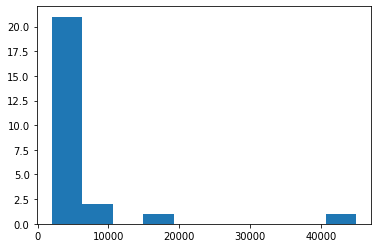

In [50]:
plt.hist(income);

In [51]:
round(statistics.mean(income), 2)

5700

In [52]:
round(statistics.median(income), 2)

3000

In [53]:
round(statistics.mode(income), 2)

2000

Huff D. How To Lie With Statistics, 1954.

### Об ограниченности статистик

In [60]:
import pandas as pd
data = pd.read_csv('Graphs.csv', sep = ';', decimal=',')
data

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


Вычислите среднее арифмитическое, дисперсию, корреляцию между $x_i$ и $y_i$. Почему вы получаете такие значения? Обоснуйте ваши суждения с помощью диаграммы рассеяния.

In [61]:
data.mean()

x1    9.000000
x2    9.000000
x3    9.000000
x4    9.000000
y1    7.500909
y2    7.500909
y3    7.500000
y4    7.500909
dtype: float64

In [62]:
data.var()

x1    11.000000
x2    11.000000
x3    11.000000
x4    11.000000
y1     4.127269
y2     4.127629
y3     4.122620
y4     4.123249
dtype: float64

In [63]:
data.corr()

,x1,x2,x3,x4,y1,y2,y3,y4
x1,1.000000,1.000000,1.000000,-0.500000,0.816421,0.816237,0.816287,-0.314047
x2,1.000000,1.000000,1.000000,-0.500000,0.816421,0.816237,0.816287,-0.314047
x3,1.000000,1.000000,1.000000,-0.500000,0.816421,0.816237,0.816287,-0.314047
x4,-0.500000,-0.500000,-0.500000,1.000000,-0.529093,-0.718437,-0.344661,0.816521
y1,0.816421,0.816421,0.816421,-0.529093,1.000000,0.750005,0.468717,-0.489116
y2,0.816237,0.816237,0.816237,-0.718437,0.750005,1.000000,0.587919,-0.478095
y3,0.816287,0.816287,0.816287,-0.344661,0.468717,0.587919,1.000000,-0.155472
y4,-0.314047,-0.314047,-0.314047,0.816521,-0.489116,-0.478095,-0.155472,1.000000


In [69]:
import numpy as np

In [75]:
def line_plot(x,y):
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))

In [76]:
?np.polyfit

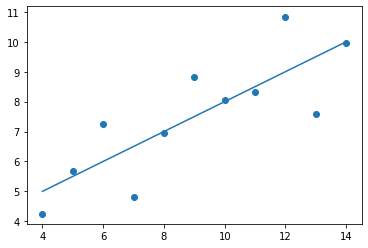

In [77]:
plt.scatter(data['x1'], data['y1'])
line_plot(data['x1'], data['y1'])

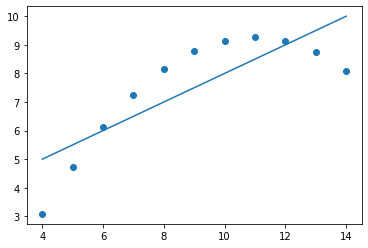

In [78]:
plt.scatter(data['x2'], data['y2'])
line_plot(data['x2'], data['y2'])

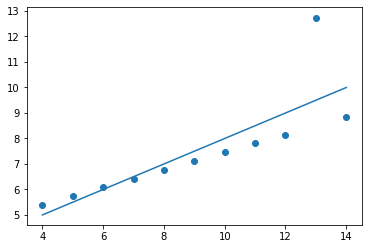

In [82]:
plt.scatter(data['x3'], data['y3'])
line_plot(data['x3'], data['y3'])

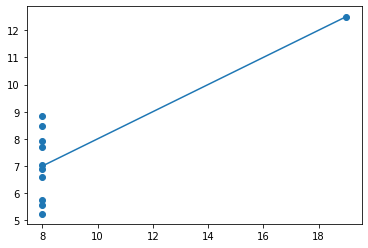

In [83]:
plt.scatter(data['x4'], data['y4'])
line_plot(data['x4'], data['y4'])

Anscombe F.J. (1973). Graphs in Statistical Analysis. American Statistician, 27(1): 17–21.